In [1]:
# Import the packages required
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
# load the data from the datasets available in scikit learn
dataset = datasets.load_iris()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [3]:
# print the data structure information
print(dataset.keys())
print(dataset.data.shape)
print(dataset.feature_names)
print(dataset.target_names)
print(dataset.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:   

In [4]:
# Define the algorithm to be used
alg = DecisionTreeClassifier(max_depth=3)

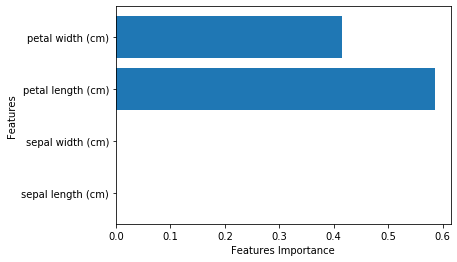

In [5]:
# Graph the importance of the features in the prediction
alg.fit(dataset.data, dataset.target)
features = dataset.data.shape[1]
plt.barh(range(features), alg.feature_importances_)
plt.yticks(np.arange(features), dataset.feature_names)
plt.xlabel('Features Importance')
plt.ylabel('Features')
plt.show()

In [6]:
# select the x and y data
x = dataset.data[:, 2:]
y = dataset.target
print(x.shape, y.shape)
print(x[0], y[0])

(150, 2) (150,)
[1.4 0.2] 0


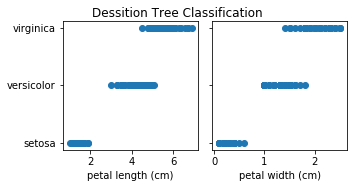

In [7]:
# plot the information
legends = dataset.feature_names[2:]
categories = dataset.target_names
num_graphs = len(legends)

figure, plots = plt.subplots(1, num_graphs, figsize=(2.5*num_graphs, 2.5))
figure.suptitle('Dessition Tree Classification', y=1.02)

y_cat = [categories[i] for i in y]

for g in range(num_graphs):
    plots[g].scatter(x[:,g], y_cat)
    plots[g].set_xlabel(legends[g])
    if g != 0 : plots[g].set_yticklabels([])

plt.tight_layout(pad=1)
plt.show()

In [8]:
# Split the dataset in training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [9]:
# Fit the model using the algorithm
alg.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

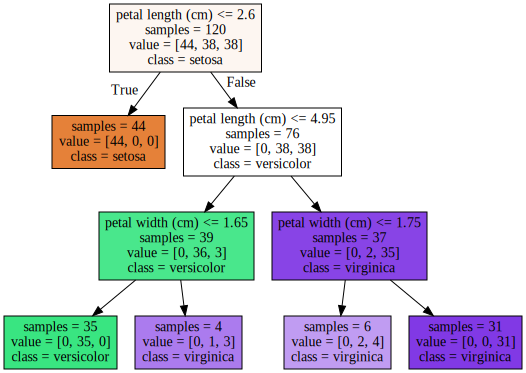

In [11]:
# Graph the Dessition Tree
treefile = '../../data/tree.dot'
export_graphviz(alg, out_file=treefile, class_names=categories, feature_names=legends, impurity=False, filled=True)
graphviz.Source.from_file(treefile)

In [ ]:
# Generate a prediction over the test data using the model
y_pred = alg.predict(x_test)
print(y_pred.shape)
print(y_pred[:10])
print(y_test[:10])

In [ ]:
# Graph the test data with the model line
figure, plots = plt.subplots(1, num_graphs, figsize=(2.5*num_graphs, 2.5))
figure.suptitle('Dessition Tree Classification', y=1.02)

y_pred_cat = [categories[i] for i in y_pred]

for g in range(num_graphs):
    data_test = sorted(zip(x_test[:,g], y_pred_cat), key = lambda i : i[0])

    plots[g].scatter(x[:,g], y_cat)
    plots[g].plot([i[0] for i in data_test], [i[1] for i in data_test], color='red', linewidth=3)
    plots[g].set_xlabel(legends[g])
    if g != 0 : plots[g].set_yticklabels([])
    
plt.tight_layout(pad=1)
plt.show()

In [ ]:
# Validate, using the confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

In [ ]:
# Verify the model error based on R²
print('certainty:', alg.score(x_train, y_train) * 100, '%')
print('certainty:', alg.score(x_test, y_test) * 100, '%')